# Further De-Identifying Anonymized Medical Records

## Edward Tatchim, Sanjiv M. Narayan, Rohan Krishnamurty
## Datasci 233, Fall 2024, Session 1; v0.1, 11/23/2024

### Project Goals
To identify different clinical profiles (“Phenotypes”) of patients who presented to the Emergency room of Harvard Teaching Hospitals, quantify their risk of attribute or membership disclosure using k-anonymity, L-diversity and t-closeness in the baseline state and after various generalization and data suppression techniques which may effectively “hide” profiles and reduce disclosure. We use real-world medical data in the form of MIMIC-IV released through MIT and Beth Israel Hospital and covering admissions to their intensive care unit from 2008 to 2019. This work is in preparation for submission to the Scientific sessions of the Heart Rhythm Society 2025.

### Data Use Permissions
To access data for our project, we turned to the Physionet resource. All team members proceeded to complete specific training in human data handling, HIPAA and confidentiality. Each team member obtained a CITI certification to work on human data, which was submitted and formally approved by the Physionet organization (Harvard/Beth Israel Hospital; Massachussetts Institute of Technology) for this project. Certifications and approvals for each team member are available upon request. Only de-identified data will be shown during presentations and publications.

### Data Resource
MIMIC-IV is a publicly available de-identified database sourced from the electronic health records of the Harvard University/Beth Israel Deaconess Medical Center. For this study, we used a subset represented in this dataset. 
https://physionet.org/content/mimic-iv-ecg-ext-icd-labels/1.0.1/ Information available includes patient measurements, orders, diagnoses, procedures, treatments, and deidentified free-text clinical notes.  We use the core table that allows retrieval of different kinds of discharge diagnoses (as ICD-10-CM codes) for a given sample in MIMIV-IV-ECG. The scope of this project does not include processing of detailed clinical data (https://physionet.org/content/mimiciv/2.2/) or ECG waveforms (https://physionet.org/content/mimic-iv-ecg/1.0/), which would require more time than available for this project. 

### De-identification process
"Patient identifiers as stipulated by HIPAA were removed. Patient identifiers were replaced using a random cipher, resulting in deidentified integer identifiers for patients, hospitalizations, and ICU stays. Structured data were filtered using look up tables and allow lists. If necessary, a free-text deidentification algorithm was applied to remove PHI from free-text. Finally, date and times were shifted randomly into the future using an offset measured in days. A single date shift was assigned to each subject_id. As a result, the data for a single patient are internally consistent. For example, if the time between two measures in the database was 4 hours in the raw data, then the calculated time difference in MIMIC-IV will also be 4 hours. Conversely, distinct patients are not temporally comparable. That is, two patients admitted in 2130 were not necessarily admitted in the same year."

### References
1. Strodthoff, N., Lopez Alcaraz, J. M., & Haverkamp, W. (2024). MIMIC-IV-ECG-Ext-ICD: Diagnostic labels for MIMIC-IV-ECG (version 1.0.1). PhysioNet. https://doi.org/10.13026/ypt5-9d58.
2. Strodthoff, N. Alcaraz, J.M.L., & Haverkamp, W. (2024). Prospects for Artificial Intelligence-Enhanced ECG as a Unified Screening Tool for Cardiac and Non-Cardiac Conditions – An Explorative Study in Emergency Care, European Heart Journal - Digital Health, ztae039.
3. Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

## Data Dictionary - see Appendix

This is an extensive data repository as summarized in this link: https://physionet.org/content/mimiciv/2.2/  

## Code - Imports, Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

#code from Lab 2, DATASCI 233
def safe_print_err(e, locals=locals(), globals=globals()):
    locals = locals or {}
    globals = globals or {}
    __problem = eval('__problem', locals, globals)
    err_msg = str(e)
    if type(e) in (NameError, KeyError):
        var_name_split = str(e).split("'")
        if len(var_name_split) > 1:
            var_name = var_name_split[1]
            err_msg = f"'{var_name}' is not defined."

    display(Markdown(f"<div class='alert alert-block alert-danger'><b>Error in problem {__problem}</b>: {err_msg}</div>"))

def print_mk(msg):
    display(Markdown(msg))

In [2]:
df = pd.read_csv("records_w_diag_icd10.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800035 entries, 0 to 800034
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   file_name                800035 non-null  object 
 1   study_id                 800035 non-null  int64  
 2   subject_id               800035 non-null  int64  
 3   ecg_time                 800035 non-null  object 
 4   ed_stay_id               184720 non-null  float64
 5   ed_hadm_id               125314 non-null  float64
 6   hosp_hadm_id             298258 non-null  float64
 7   ed_diag_ed               800035 non-null  object 
 8   ed_diag_hosp             800035 non-null  object 
 9   hosp_diag_hosp           800035 non-null  object 
 10  all_diag_hosp            800035 non-null  object 
 11  all_diag_all             800035 non-null  object 
 12  gender                   800035 non-null  object 
 13  age                      795546 non-null  float64
 14  anch

In [3]:
df.head()

,file_name,study_id,subject_id,ecg_time,ed_stay_id,ed_hadm_id,hosp_hadm_id,ed_diag_ed,ed_diag_hosp,hosp_diag_hosp,...,age,anchor_year,anchor_age,dod,ecg_no_within_stay,ecg_taken_in_ed,ecg_taken_in_hosp,ecg_taken_in_ed_or_hosp,fold,strat_fold
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,40689238,10000032,2180-07-23 08:44:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,0,True,False,True,17,9
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,44458630,10000032,2180-07-23 09:54:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,1,True,False,True,17,9
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,49036311,10000032,2180-08-06 09:07:00,NaN,NaN,25742920.0,[],[],"['J449', 'B182', 'E871', 'R197', 'V462', 'R188...",...,52.0,2180.0,52.0,2180-09-09,0,False,True,True,17,9
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,45090959,10000117,2181-03-04 17:14:00,NaN,NaN,NaN,[],[],[],...,55.0,2174.0,48.0,NaN,-1,False,False,False,18,0
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,48446569,10000117,2183-09-18 13:52:00,33176849.0,27988844.0,NaN,"['S72092A', 'W1830XA']","['K219', 'F419', 'Z7901', 'Z87891', 'G43909', ...",[],...,57.0,2174.0,48.0,NaN,0,True,False,True,18,0


In [4]:
df['all_diag_hosp'].head()

0    ['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...
1    ['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...
2    ['K7469', 'E871', 'E875', 'R197', 'J449', 'R18...
3                                                   []
4    ['E7800', 'K219', 'Z87442', 'S72012A', 'I341',...
Name: all_diag_hosp, dtype: object

In [55]:
# Function k_anon can test different k-anonymity guarantees

def k_anon (dataset, qID):
    #qIDs: quasi-identifiers
    subset_df = dataset[qID]

    # Drop duplicate rows based on the quasi-identifiers
    #eqv_classes = subset_df.drop_duplicates().reset_index(drop=True)

    # Group the original data by quasi-identifiers and count the number of rows in each group
    eqv_classes = dataset.groupby(qID).size().reset_index(name='k')

    # Calculate the best k-anonymity guarantee, which is the minimum value of 'k' across all equivalence classes
    k_min = eqv_classes['k'].min()

    try:
        print_mk(f"There are ${len(eqv_classes)}$ equivalence classes:")
        display(eqv_classes)
        print_mk(f"The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k={k_min}.$")
    except Exception as e:
        safe_print_err(e)
    return

In [56]:
qID = ['file_name', 'all_diag_all', 'gender', 'age', 'ecg_no_within_stay']
k_anon(df, qID)

There are $795546$ equivalence classes:

,file_name,all_diag_all,gender,age,ecg_no_within_stay,k
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...",F,52.0,0,1
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'R64', 'E875', 'I9581', 'J44...",F,52.0,1,1
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['K7469', 'E871', 'E875', 'R197', 'J449', 'R18...",F,52.0,0,1
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,[],F,55.0,-1,1
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['E7800', 'K219', 'Z87442', 'S72012A', 'I341',...",F,57.0,0,1
...,...,...,...,...,...,...
795541,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['J9690', 'E785', 'I69952', 'J690', 'G40301', ...",M,58.0,0,1
795542,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['J9690', 'E785', 'I69952', 'J690', 'G40301', ...",M,58.0,1,1
795543,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['H53469', 'R569', 'N390', 'E039', 'I619', 'I2...",F,57.0,0,1
795544,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,"['H53469', 'R569', 'N390', 'E039', 'I619', 'I2...",F,57.0,0,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [57]:
qID = ['all_diag_all', 'gender', 'age', 'ecg_no_within_stay']
k_anon(df, qID)

There are $402884$ equivalence classes:

,all_diag_all,gender,age,ecg_no_within_stay,k
0,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,87.0,0,1
1,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,87.0,1,1
2,"['A021', 'E860', 'F329', 'E785', 'I10', 'K219'...",M,91.0,0,1
3,"['A021', 'E860', 'N008', 'D500', 'R32', 'M8440...",F,95.0,0,1
4,"['A021', 'E871', 'A048', 'D649', 'K219', 'K510...",M,56.0,0,1
...,...,...,...,...,...
402879,[],M,96.0,-1,78
402880,[],M,97.0,-1,39
402881,[],M,98.0,-1,18
402882,[],M,99.0,-1,8


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [58]:
qID = ['all_diag_all', 'gender', 'ecg_no_within_stay']
k_anon(df, qID)

There are $381098$ equivalence classes:

,all_diag_all,gender,ecg_no_within_stay,k
0,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,0,1
1,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",F,1,1
2,"['A021', 'E860', 'F329', 'E785', 'I10', 'K219'...",M,0,1
3,"['A021', 'E860', 'N008', 'D500', 'R32', 'M8440...",F,0,1
4,"['A021', 'E871', 'A048', 'D649', 'K219', 'K510...",M,0,1
...,...,...,...,...
381093,[],M,4,2
381094,[],M,5,2
381095,[],M,6,1
381096,[],M,7,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [59]:
qID = ['gender', 'ecg_no_within_stay']
k_anon(df, qID)

There are $151$ equivalence classes:

,gender,ecg_no_within_stay,k
0,F,-1,162235
1,F,0,147879
2,F,1,38123
3,F,2,15590
4,F,3,8471
...,...,...,...
146,M,102,1
147,M,103,1
148,M,104,1
149,M,105,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [60]:
qID = ['gender', 'ecg_no_within_stay']

df_no_missing_gender = df[df["gender"] != "missing"]
k_anon(df_no_missing_gender, qID)

There are $150$ equivalence classes:

,gender,ecg_no_within_stay,k
0,F,-1,162235
1,F,0,147879
2,F,1,38123
3,F,2,15590
4,F,3,8471
...,...,...,...
145,M,101,1
146,M,102,1
147,M,103,1
148,M,104,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [61]:
df['ecg_no_within_stay'].describe()

count    800035.000000
mean          0.212642
std           2.199587
min          -1.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max         105.000000
Name: ecg_no_within_stay, dtype: float64

<AxesSubplot:>

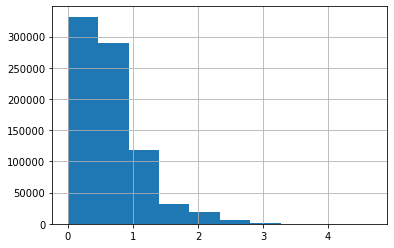

In [62]:
df['lecg_no_within_stay'] = np.log(df['ecg_no_within_stay']+2)
df['lecg_no_within_stay'].hist()

In [63]:
#binnng ecg_numbers


In [64]:
qID = ['all_diag_all']
k_anon(df, qID)

There are $210255$ equivalence classes:

,all_diag_all,k
0,"['A021', 'E785', 'N185', 'Z951', 'Z950', 'I489...",2
1,"['A021', 'E860', 'F329', 'E785', 'I10', 'K219'...",1
2,"['A021', 'E860', 'N008', 'D500', 'R32', 'M8440...",1
3,"['A021', 'E871', 'A048', 'D649', 'K219', 'K510...",1
4,"['A021', 'I10', 'F1021', 'Z794', 'E119', 'L309...",2
...,...,...
210250,"['Z993', 'R079']",2
210251,"['Z9981', 'J449', 'J40']",1
210252,"['Z9981', 'J449', 'R0602']",1
210253,"['Z9981', 'Z87891', 'J449', 'J189']",2


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [65]:
qID = ['gender']
k_anon(df, qID)

There are $3$ equivalence classes:

,gender,k
0,F,389335
1,M,406211
2,missing,4489


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=4489.$

In [66]:
df['all_diag_all'].nunique()

210255

In [67]:
#binnng ecg_numbers


In [83]:
#add column for "sensitive" diagnosis
#https://www.icd10data.com/ICD10CM/Codes
sensitive_icd_code = 'Z951'
df_sensitive = df

df_sensitive['sensitive_diag'] = 0
df_sensitive['sensitive_diag']= df_sensitive['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)

df_sensitive['sensitive_diag'].value_counts()

0    768444
1     31591
Name: sensitive_diag, dtype: int64

In [76]:
qID = ['gender', 'age', 'ecg_no_within_stay', 'sensitive_diag']
k_anon(df_sensitive, qID)

There are $5082$ equivalence classes:

,gender,age,ecg_no_within_stay,sensitive_diag,k
0,F,12.0,-1,0,1
1,F,15.0,-1,0,1
2,F,16.0,-1,0,4
3,F,17.0,-1,0,17
4,F,18.0,-1,0,188
...,...,...,...,...,...
5077,M,99.0,12,0,1
5078,M,99.0,13,0,1
5079,M,100.0,-1,0,1
5080,M,100.0,0,0,3


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [77]:
qID = ['gender', 'ecg_no_within_stay', 'sensitive_diag']
k_anon(df_sensitive, qID)

There are $212$ equivalence classes:

,gender,ecg_no_within_stay,sensitive_diag,k
0,F,-1,0,162235
1,F,0,0,143100
2,F,0,1,4779
3,F,1,0,36284
4,F,1,1,1839
...,...,...,...,...
207,M,102,0,1
208,M,103,0,1
209,M,104,0,1
210,M,105,0,1


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [81]:
# Generalize 'ecg_no_within_stay'
df_sensitive_generalecg=df_sensitive
df_sensitive_generalecg['generalized_ecg'] = df_sensitive['ecg_no_within_stay'].apply(lambda x:
           0 if x in [-1, 0] else
           x if 1 <= x <= 10 else
           11 if x >10
           else x
)

In [82]:
qID = ['gender', 'generalized_ecg', 'sensitive_diag']
k_anon(df_sensitive, qID)

There are $49$ equivalence classes:

,gender,generalized_ecg,sensitive_diag,k
0,F,0,0,305335
1,F,0,1,4779
2,F,1,0,36284
3,F,1,1,1839
4,F,2,0,14697
5,F,2,1,893
6,F,3,0,7920
7,F,3,1,551
8,F,4,0,4812
9,F,4,1,336


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=25.$

In [96]:
#add column for "sensitive" diagnosis = B20 unspecified HIV
#https://www.icd10data.com/ICD10CM/Codes
sensitive_icd_code = '2000'
df_sensitive = df

df_sensitive['sensitive_diag'] = 0
df_sensitive['sensitive_diag']= df_sensitive['all_diag_all'].apply(lambda x: 1 if sensitive_icd_code in x else 0)

df_sensitive['sensitive_diag'].value_counts()

0    799767
1       268
Name: sensitive_diag, dtype: int64

In [97]:
# Generalize 'ecg_no_within_stay'
df_sensitive_generalecg=df_sensitive
df_sensitive_generalecg['generalized_ecg'] = df_sensitive['ecg_no_within_stay'].apply(lambda x:
           0 if x in [-1, 0] else
           x if 1 <= x <= 10 else
           11 if x >10
           else x
)

In [99]:
qID = ['gender', 'generalized_ecg', 'sensitive_diag']
k_anon(df_sensitive_generalecg, qID)

There are $41$ equivalence classes:

,gender,generalized_ecg,sensitive_diag,k
0,F,0,0,310002
1,F,0,1,112
2,F,1,0,38096
3,F,1,1,27
4,F,2,0,15578
5,F,2,1,12
6,F,3,0,8463
7,F,3,1,8
8,F,4,0,5145
9,F,4,1,3


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

In [101]:
qID = ['generalized_ecg', 'sensitive_diag']
k_anon(df_sensitive_generalecg, qID)

There are $21$ equivalence classes:

,generalized_ecg,sensitive_diag,k
0,0,0,621913
1,0,1,183
2,1,0,81972
3,1,1,46
4,2,0,35718
5,2,1,19
6,3,0,19746
7,3,1,10
8,4,0,12098
9,4,1,4


The best $k-Anonymity$ guarantee for `records_w_diag_icd10` is $k=1.$

# Appendix 
See this video to see tutorial on MIMIC-IV https://slideslive.com/embed/presentation/38931965

This is an extensive data repository as summarized in this link: https://physionet.org/content/mimiciv/2.2/  In summary, our data resource contains:<br> 
<br>*file_name*<br>
800035 non-null path to the waveform
<br>*study_id*<br>
800035 non-null study id within MIMIC-IV-ECG
<br>*subject_id*<br>
800035 non-null subject_id	patient id within MIMIC-IV-ECG
<br>*ecg_time*<br>
800035 non-null ecg_time	time of the waveform collection
<br>*ed_stay_id*<br>
184720 non-null ed_stay_id	ED stay identifier
<br>*ed_hadm_id*<br>
125314 non-null ed_hadm_id	hospital admission identifier sourced from the ED system
<br>*hosp_hadm_id*<br>
298258 non-null hosp_hadm_id	hospital admission identifier
<br>*ed_diag_ed*<br>
800035 non-null ed_diag_ed	CD-10-CM ED discharge diagnoses sourced from the ED system
<br>*ed_diag_hosp*<br>
800035 non-null 
<br>*hosp_diag_hosp*<br>
800035 non-null hosp_diag_hosp	ICD-10-CM hospital discharge diagnoses sourced from MIMIC-IV via 'hadm_id'

<br>*all_diag_all*<br>
800035 non-null all_diag_all	'all_diag_hosp' if available otherwise 'ed_diag_ed'
<br>*all_diag_hosp*<br>
800035 non-null all_diag_hosp	unique hospital discharge diagnoses after concatenating 'ed_diag_hosp' and 'hosp_diag_hosp'
<br>*gender*<br>
800035 non-null gender	patient's gender
<br>*age*<br>
795546 non-null age	patient age at the time of ECG recording calculated from 'anchor_age', 'anchor_year', and 'ecg_time'
<br>*anchor_year*<br>
795546 non-null anchor_age	age at 'anchor_year'
<br>*anchor_age*<br>
795546 non-null anchor_year	specified reference year
<br>*dod*<br>
218648 non-null dod	date of death (if applicable)
<br>*ecg_no_within_stay*<br>
800035 non-null ecg_no_within_stay	enumerates ECGs within a given ED/hospital stay
<br>*ecg_taken_in_ed*<br>
800035 non-null ecg_taken_in_ed	boolean variable indicating if the ECG was taken in the ED
<br>*ecg_taken_in_hosp*<br>
800035 non-null ecg_taken_in_hosp	boolean variable indicating if the ECG was taken in the hospital
<br>*ecg_taken_in_ed_or_hosp*<br>
800035 non-null ecg_taken_in_ed_or_hosp	boolean variable indicating if the ECG was taken in ED or hospital (i.e. no outpatient ECG)
<br>*fold* <br>
800035 non-null fold	random fold assignments (without patient overlap) to reproduce benchmarking results from [1]
<br>*strat_fold*<br> 
800035 non-null strat_fold	alternative stratified folds using multi-label stratification (applied to 'all_diag_all' truncated to 5 digits and uppropagation along the label tree, gender, age (binned) and outpatient status)

## For further analysis
MIMIC-IV is grouped into two modules: *hosp*, and *icu*. The aim of these modules is to highlight their provenance.

### hosp 
The hosp module contains data derived from the hospital wide EHR. 

*patients* table provides timing information. 
<br>*anchor_age:* patient age in the given anchor_year. If > 89, anchor_age is set to 91
<br>*anchor_year:*   Deidentified year occurring sometime between 2100 - 2200,
<br>*anchor_year_group:*  3Y long date range between 2008 - 2019. These dates allow researchers to infer approximate year of care.
<br>*dod:* Date of death, from hospital records (primary) and state records (matched using a custom rule based linkage algorithm based on name, date of birth, and social security number). Dates of death >1 Y after discharge are censored for deidentification. Thus, the maximum time of follow up for each patient is exactly one year after their last hospital discharge. 
<br>*labevents, d_labitems:* laboratory measurements
<br>*microbiologyevents, d_micro:* , microbiology cultures
<br>*poe, poe_detail:* provider orders,
<br>*emar, emar_detail:* medication administration,
<br>*prescriptions, pharmacy:* medication prescription,
<br>*diagnoses_icd, d_icd_diagnoses,procedures_icd, d_icd_procedures, hcpcsevents, d_hcpcs, drgcodes:* hospital billing information,
<br>*omr:* online medical record data
<br>*services:* service related information;
<br>* provider_id:* Deidentified character string which uniquely represents a single care provider. 
<br>*admit_provider_id:* provider who admits the patient to the hospital

### icu
Contains data sourced from the clinical information system at the BIDMC: MetaVision (iMDSoft). MetaVision tables were denormalized to create a star schema where the icustays and d_items tables link to a set of data tables all suffixed with "events".

<br>*inputevents:* intravenous and fluid inputs;
<br>*ingredientevents:* ingredients for the aforementioned inputs;
<br>*outputevents:* patient outputs;
<br>*procedureevents:* procedures;
<br>*datetimeevents:* information documented as a date or time;
<br>*chartevents:* other charted information;

All events tables contain a stay_id column allowing identification of the associated ICU patient in icustays, and an itemid column allowing identification of the concept documented in d_items. 

Caregiver table contains caregiver_id, a deidentified integer representing the care provider who documented data into the system. 

Events tables (chartevents, datetimeevents, ingredientevents, inputevents, outputevents, procedureevents) have a caregiver_id column which links to the caregiver table.